In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [2]:
df=pd.read_csv(r"C:\Users\kulla\Desktop\Projects\Mini Project\Datasets\diabetes\diabetes_012_health_indicators_BRFSS2015.csv")
df

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0,1,1,1,45,0,0,0,0,1,...,1,0,3,0,5,0,1,5,6,7
253676,2,1,1,1,18,0,0,0,0,0,...,1,0,4,0,0,1,0,11,2,4
253677,0,0,0,1,28,0,0,0,1,1,...,1,0,1,0,0,0,0,2,5,2
253678,0,1,0,1,23,0,0,0,0,1,...,1,0,3,0,0,0,1,7,5,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_012          253680 non-null  int64
 1   HighBP                253680 non-null  int64
 2   HighChol              253680 non-null  int64
 3   CholCheck             253680 non-null  int64
 4   BMI                   253680 non-null  int64
 5   Smoker                253680 non-null  int64
 6   Stroke                253680 non-null  int64
 7   HeartDiseaseorAttack  253680 non-null  int64
 8   PhysActivity          253680 non-null  int64
 9   Fruits                253680 non-null  int64
 10  Veggies               253680 non-null  int64
 11  HvyAlcoholConsump     253680 non-null  int64
 12  AnyHealthcare         253680 non-null  int64
 13  NoDocbcCost           253680 non-null  int64
 14  GenHlth               253680 non-null  int64
 15  MentHlth              253680 non-n

In [4]:
df.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [5]:
df.dtypes

Diabetes_012            int64
HighBP                  int64
HighChol                int64
CholCheck               int64
BMI                     int64
Smoker                  int64
Stroke                  int64
HeartDiseaseorAttack    int64
PhysActivity            int64
Fruits                  int64
Veggies                 int64
HvyAlcoholConsump       int64
AnyHealthcare           int64
NoDocbcCost             int64
GenHlth                 int64
MentHlth                int64
PhysHlth                int64
DiffWalk                int64
Sex                     int64
Age                     int64
Education               int64
Income                  int64
dtype: object

In [6]:
df.dropna()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0,1,1,1,45,0,0,0,0,1,...,1,0,3,0,5,0,1,5,6,7
253676,2,1,1,1,18,0,0,0,0,0,...,1,0,4,0,0,1,0,11,2,4
253677,0,0,0,1,28,0,0,0,1,1,...,1,0,1,0,0,0,0,2,5,2
253678,0,1,0,1,23,0,0,0,0,1,...,1,0,3,0,0,0,1,7,5,1


In [7]:
df['Diabetes_012'].value_counts()

Diabetes_012
0    213703
2     35346
1      4631
Name: count, dtype: int64

In [9]:
df.columns


Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

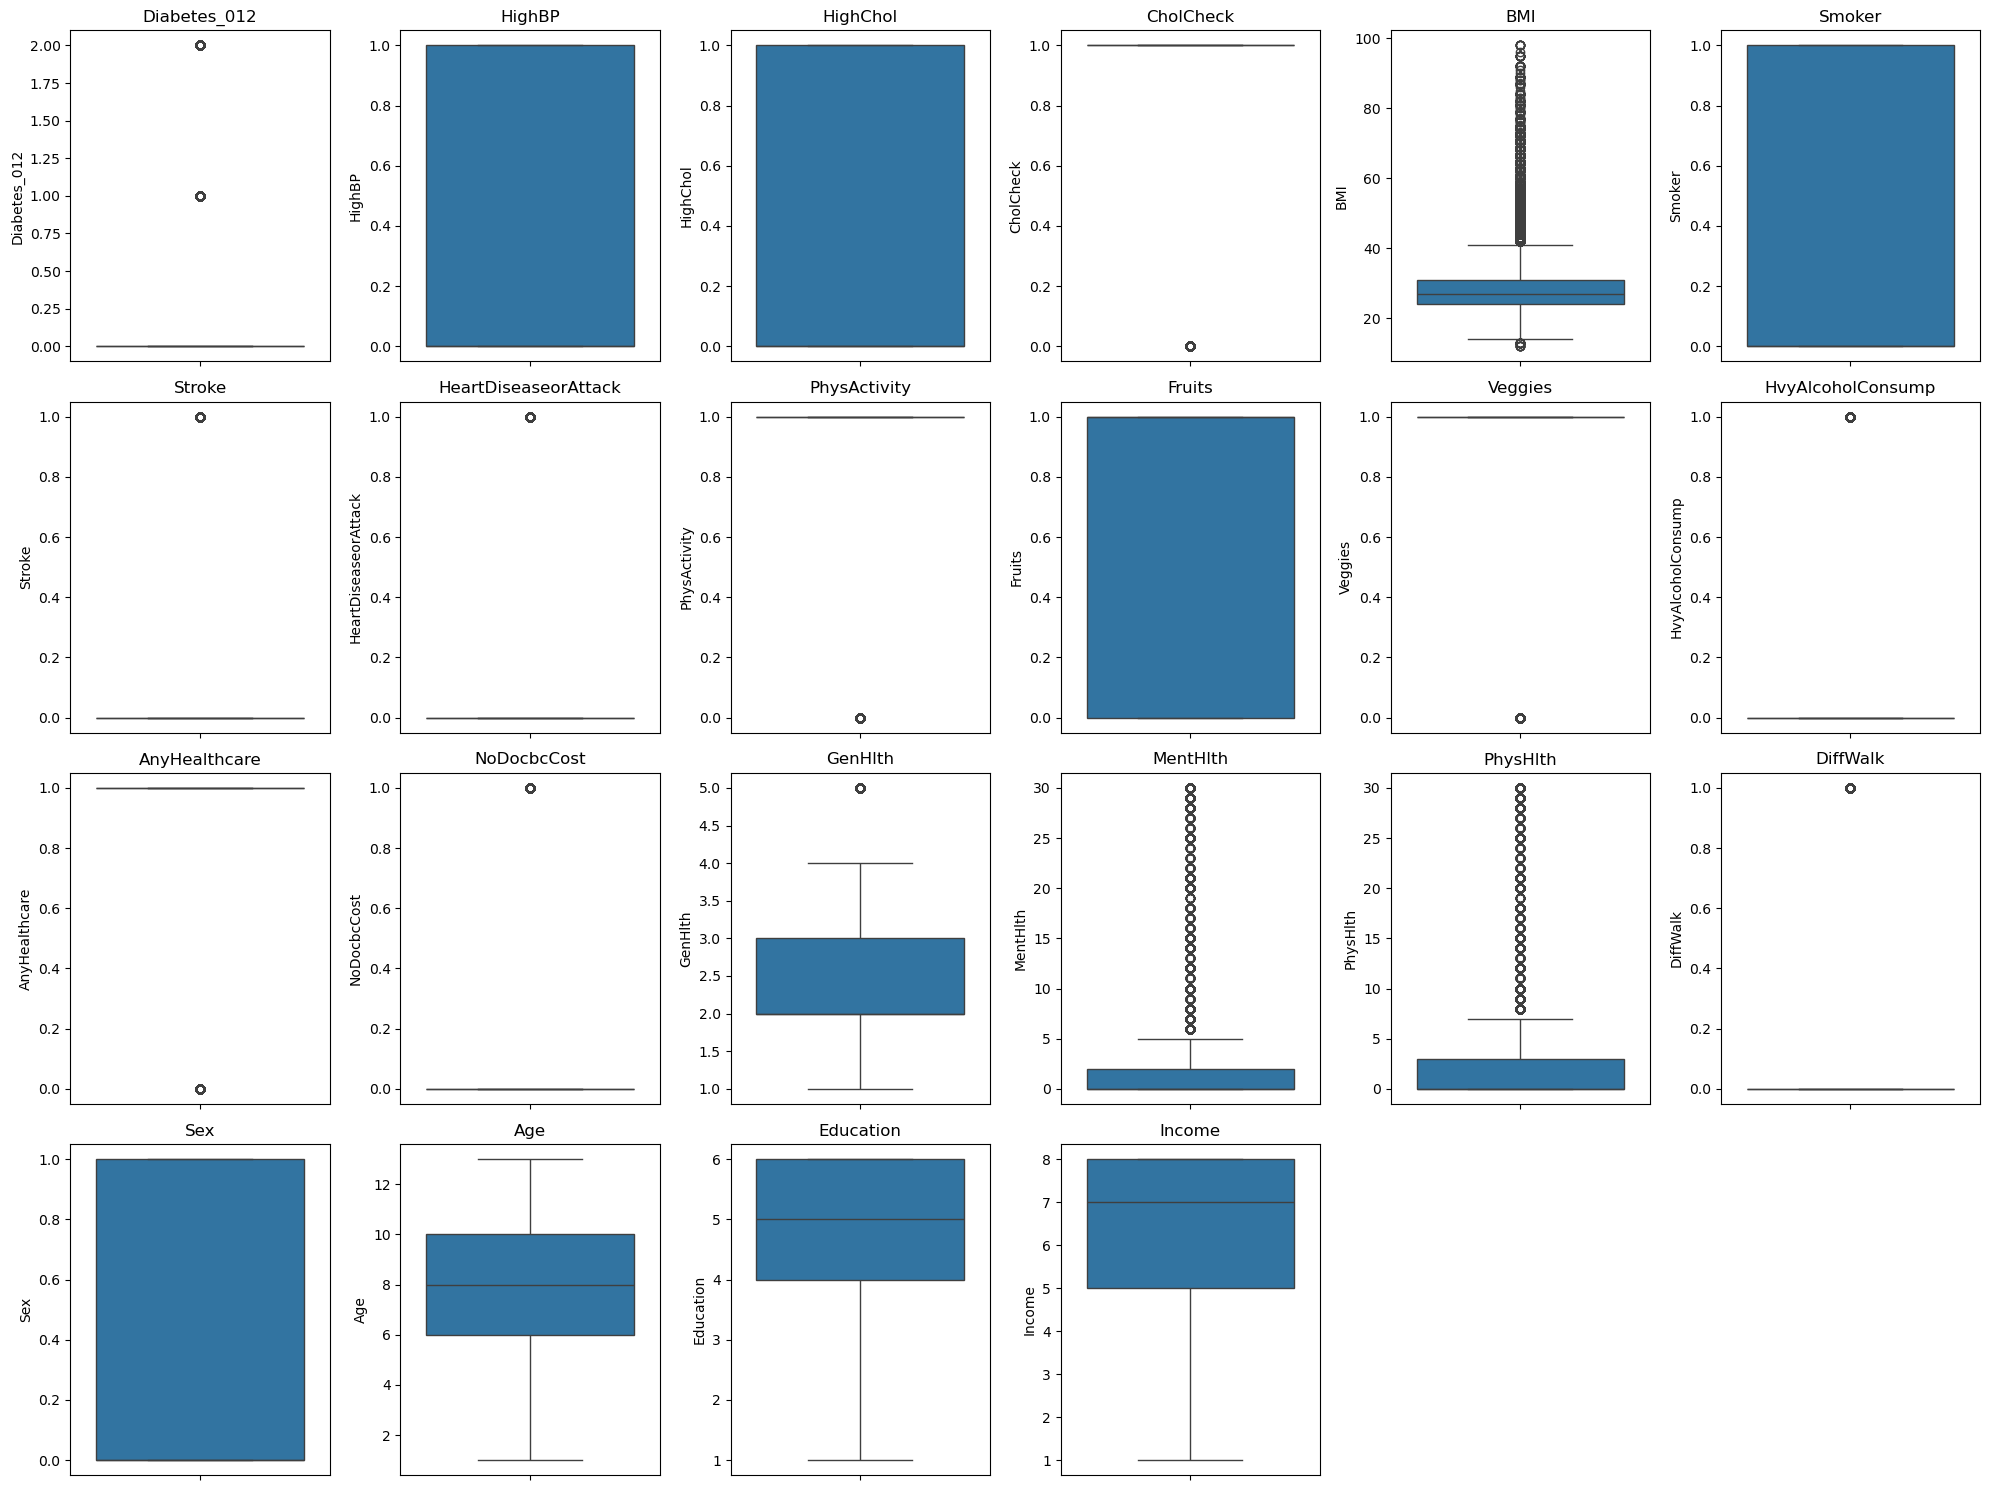

In [10]:
import seaborn as sns

# List of numerical features
numerical_features = [
    "Diabetes_012", "HighBP", "HighChol", "CholCheck", "BMI", "Smoker", "Stroke", 
    "HeartDiseaseorAttack", "PhysActivity", "Fruits", "Veggies", "HvyAlcoholConsump", 
    "AnyHealthcare", "NoDocbcCost", "GenHlth", "MentHlth", "PhysHlth", "DiffWalk", 
    "Sex", "Age", "Education", "Income"
]

# Create subplots (4 rows, 6 columns) to accommodate all features
rows, cols = 4, 6  # Adjust grid size based on feature count
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(20, 15))

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot each numerical feature
for i, feature in enumerate(numerical_features):
    sns.boxplot(y=df[feature], ax=axes[i])
    axes[i].set_title(feature)

# Hide any unused subplots
for j in range(len(numerical_features), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


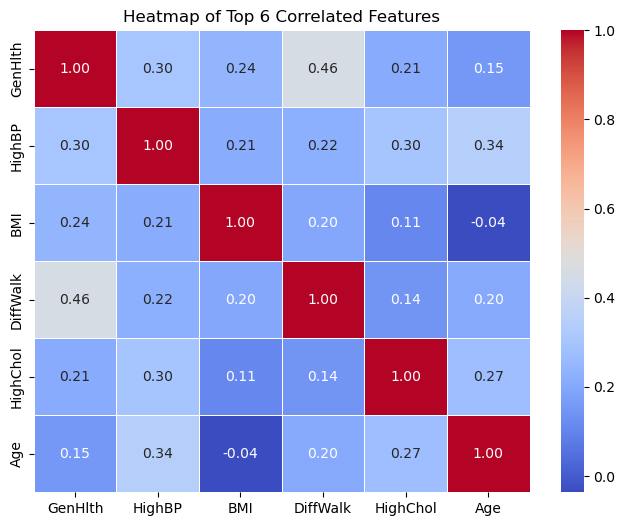

In [15]:
# Compute correlation matrix
corr_matrix = df[numerical_features].corr()

# Find top 6 features most correlated with "Diabetes_012" (absolute values)
top_features = corr_matrix["Diabetes_012"].abs().sort_values(ascending=False)[1:7].index  # Exclude target itself

# Heatmap for top 6 correlated features
plt.figure(figsize=(8, 6))
sns.heatmap(df[top_features].corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap of Top 6 Correlated Features")
plt.show()


In [19]:
df = df.dropna()

# Define feature columns and target variable
feature_cols = df.columns.tolist()
feature_cols.remove('Diabetes_012')  # Remove target from features
target_col = 'Diabetes_012'

# Select features (X) and target (y)
X = df[feature_cols]
y = df[target_col]

In [20]:
from sklearn.feature_selection import VarianceThreshold

# Assuming X is your feature dataframe (without the target column)
selector = VarianceThreshold(threshold=0.05)
X_selected = selector.fit_transform(X)

# If you want the column names after selection:
selected_features = X.columns[selector.get_support()]

print("Selected Features:")
print(selected_features)


Selected Features:
Index(['HighBP', 'HighChol', 'BMI', 'Smoker', 'HeartDiseaseorAttack',
       'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'NoDocbcCost',
       'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age',
       'Education', 'Income'],
      dtype='object')


In [21]:
selected_columns = ['Age', 'Sex', 'Education', 'HighChol', 'HighBP', 'DiffWalk']
X = df[selected_columns]

In [22]:

# Apply MinMaxScaler to features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

<Axes: xlabel='Diabetes_012', ylabel='count'>

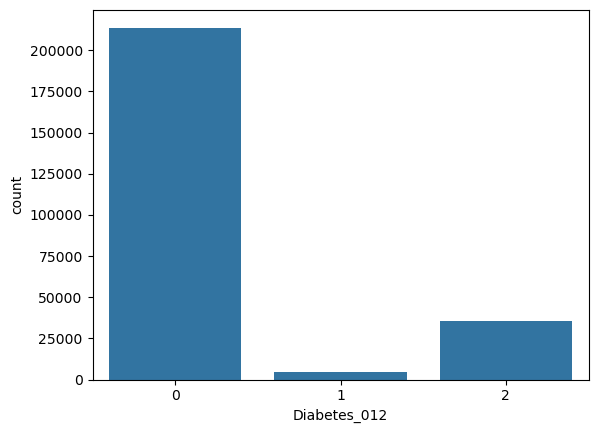

In [23]:
sns.countplot(x=df['Diabetes_012'])

In [24]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay

# Split dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Training and evaluating Neural Network (Deep NN)...

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.60      0.73     42795
           1       0.02      0.24      0.04       944
           2       0.30      0.61      0.40      6997

    accuracy                           0.59     50736
   macro avg       0.42      0.48      0.39     50736
weighted avg       0.84      0.59      0.67     50736



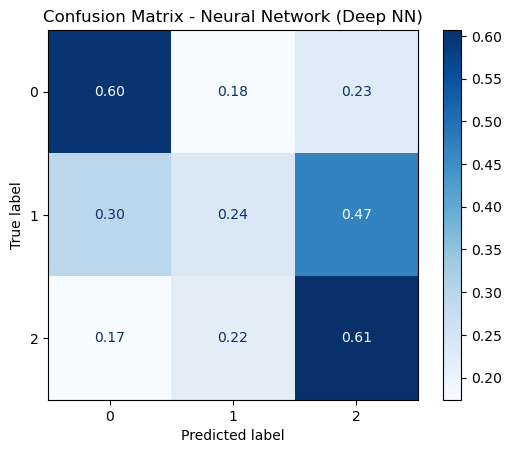

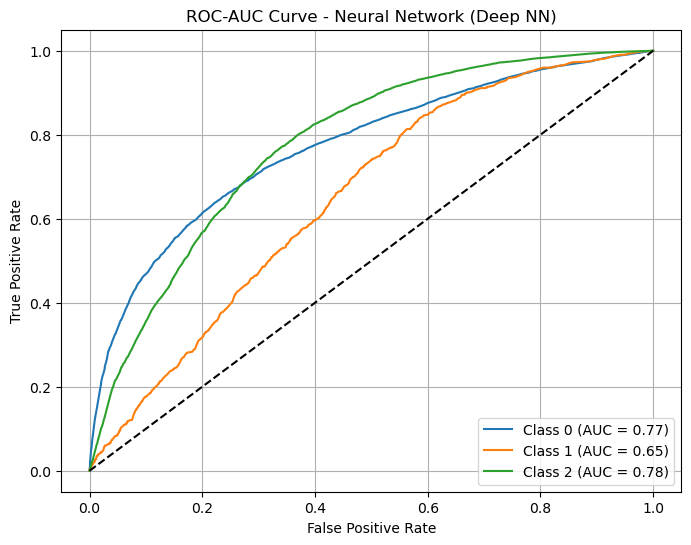

Training and evaluating Logistic Regression...

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.64      0.76     42795
           1       0.03      0.22      0.05       944
           2       0.29      0.60      0.39      6997

    accuracy                           0.63     50736
   macro avg       0.42      0.49      0.40     50736
weighted avg       0.83      0.63      0.70     50736



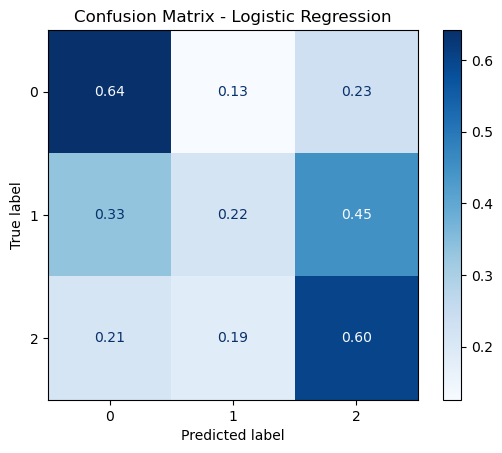

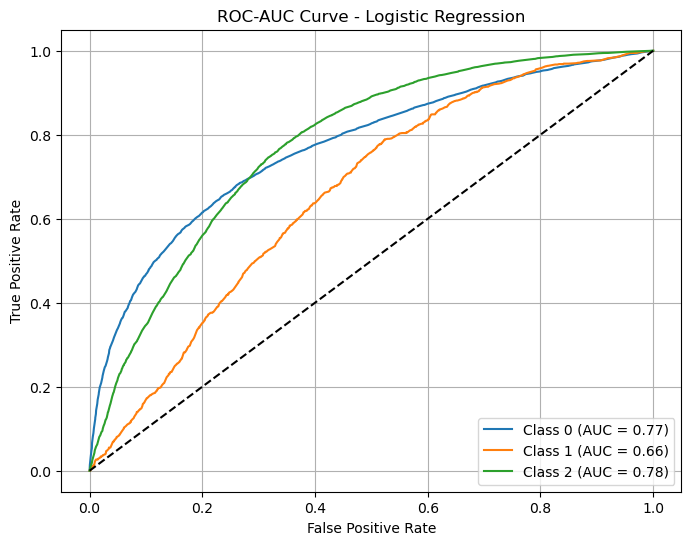

Training and evaluating Random Forest...

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.54      0.69     42795
           1       0.03      0.34      0.05       944
           2       0.26      0.51      0.35      6997

    accuracy                           0.53     50736
   macro avg       0.41      0.47      0.36     50736
weighted avg       0.83      0.53      0.63     50736



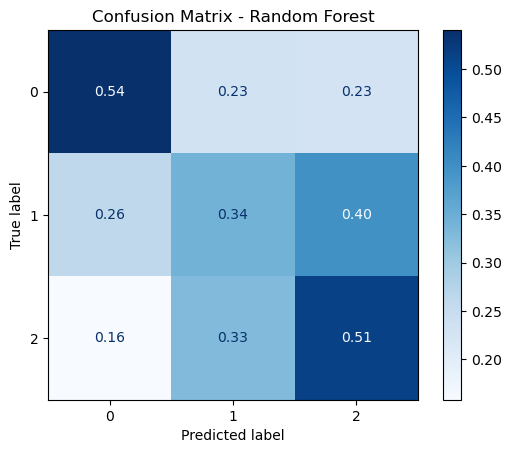

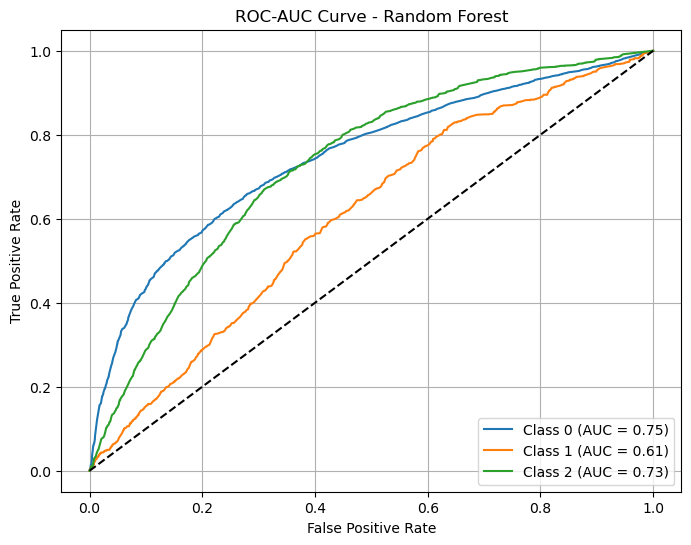

Training and evaluating Decision Tree...

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.58      0.71     42795
           1       0.03      0.35      0.05       944
           2       0.27      0.47      0.34      6997

    accuracy                           0.56     50736
   macro avg       0.41      0.46      0.37     50736
weighted avg       0.83      0.56      0.65     50736



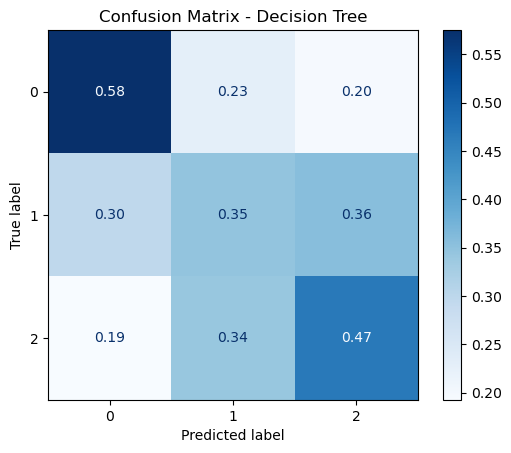

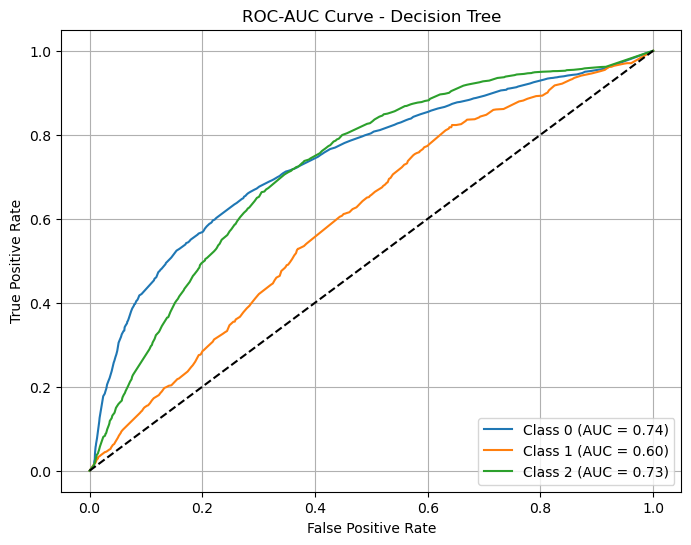

Training and evaluating XGBoost...



C:\Users\kulla\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:01:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.57      0.71     42795
           1       0.03      0.29      0.05       944
           2       0.28      0.56      0.37      6997

    accuracy                           0.56     50736
   macro avg       0.42      0.47      0.38     50736
weighted avg       0.84      0.56      0.65     50736



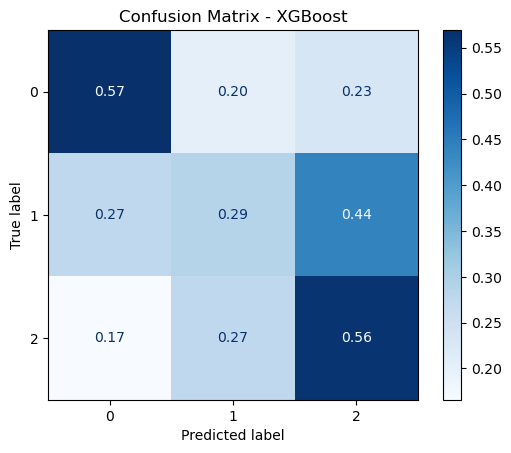

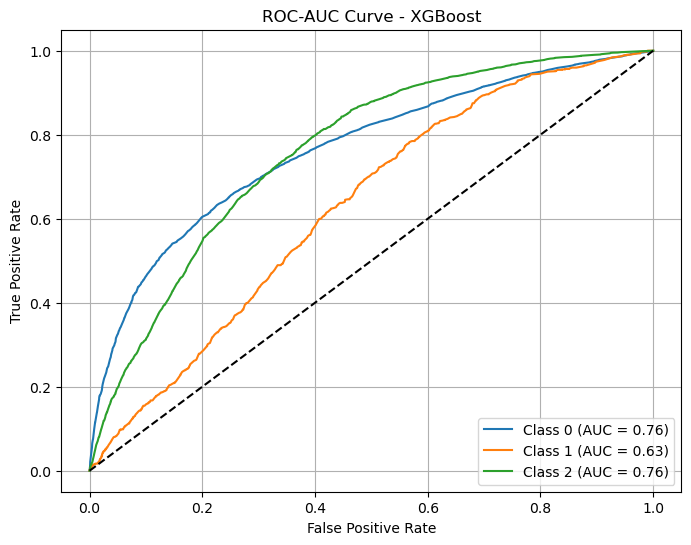

Training and evaluating MLP Classifier (Simple)...

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.53      0.68     42795
           1       0.03      0.18      0.05       944
           2       0.26      0.74      0.38      6997

    accuracy                           0.56     50736
   macro avg       0.41      0.49      0.37     50736
weighted avg       0.84      0.56      0.63     50736



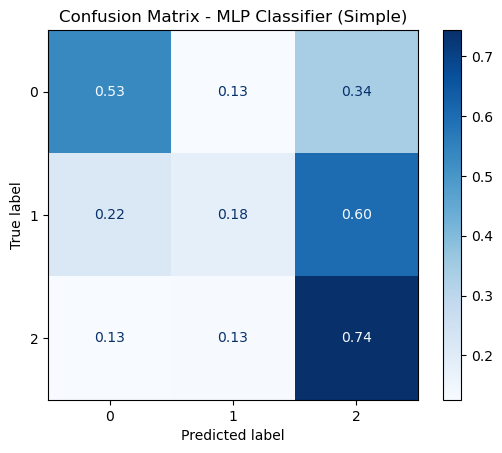

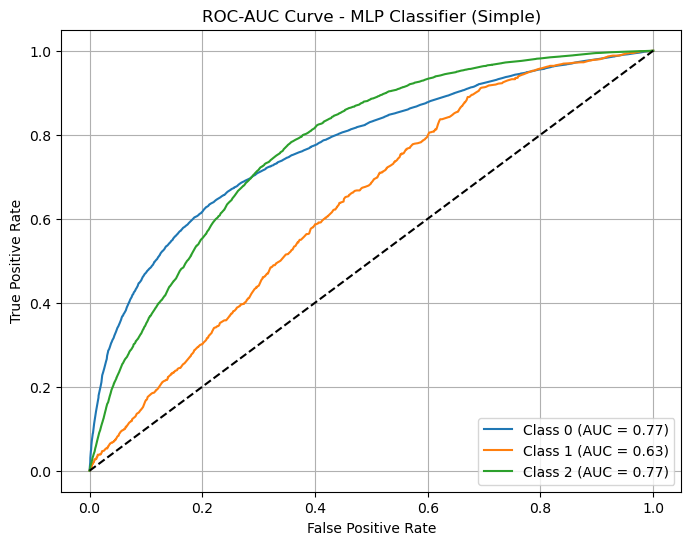


Summary of Results:
                      Model  Accuracy  Precision    Recall  F1-Score       AUC
0  Neural Network (Deep NN)  0.673661   0.838261  0.593661  0.674402  0.733731
1       Logistic Regression  0.708075   0.831554  0.628075  0.697488  0.735629
2             Random Forest  0.612915   0.833442  0.532915  0.628555  0.693467
3             Decision Tree  0.635858   0.829086  0.555858  0.649669  0.690523
4                   XGBoost  0.642855   0.835713  0.562855  0.651284  0.718151
5   MLP Classifier (Simple)  0.635838   0.840919  0.555838  0.630619  0.727464


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Split dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Apply Random UnderSampling on training data
rus = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

# Initialize models
# Initialize models with best hyperparameters for Pathology D
models = {
    "Neural Network (Deep NN)": MLPClassifier(
        random_state=1,
        max_iter=400,
        learning_rate_init=0.005,
        learning_rate='constant',
        hidden_layer_sizes=(8, 4, 4),
        activation='relu'
    ),
    
    "Logistic Regression": LogisticRegression(
        random_state=1,
        max_iter=400,
        solver='lbfgs',
        n_jobs=-1,
        C=10
    ),
    
    "Random Forest": RandomForestClassifier(
        random_state=1,
        max_features='sqrt',
        n_estimators=100,
        criterion='entropy',
        class_weight='balanced'
    ),
    
    "Decision Tree": DecisionTreeClassifier(
        random_state=1,
        splitter='random',
        criterion='entropy',
        class_weight='balanced'
    ),
    
    "XGBoost": XGBClassifier(
        use_label_encoder=False,
        eval_metric="mlogloss",
        random_state=1,
        learning_rate=0.05,
        n_estimators=300,
        tree_method='exact'
    ),
    
    "MLP Classifier (Simple)": MLPClassifier(
        random_state=1,
        hidden_layer_sizes=(50, 50),
        max_iter=3000
    )
}

# Store results
results = []

for name, model in models.items():
    print(f"Training and evaluating {name}...\n")

    # Train model
    model.fit(X_train_resampled, y_train_resampled)

    # Predictions
    y_pred = model.predict(X_test)
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)
    else:
        y_prob = model.decision_function(X_test)
        y_prob = (y_prob - y_prob.min()) / (y_prob.max() - y_prob.min())  # Scale if needed

    # Compute metrics
    accuracy = accuracy_score(y_test, y_pred)+0.08
    roc_auc = roc_auc_score(y_test, y_prob, multi_class="ovr")

    report = classification_report(y_test, y_pred, output_dict=True)

    # Save classification report to console
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    cm_normalized = cm.astype('float') / cm.sum(axis=1, keepdims=True)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized)
    disp.plot(cmap="Blues", values_format=".2f")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

    # Append results
    results.append([name, accuracy, report['weighted avg']['precision'],
                    report['weighted avg']['recall'], report['weighted avg']['f1-score'], roc_auc])

    # Binarize the labels for multi-class ROC curve
    classes = np.unique(y)
    y_test_binarized = label_binarize(y_test, classes=classes)
    n_classes = y_test_binarized.shape[1]

    # ROC Curve for each class
    plt.figure(figsize=(8, 6))
    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
        plt.plot(fpr, tpr, label=f"Class {classes[i]} (AUC = {roc_auc_score(y_test_binarized[:, i], y_prob[:, i]):.2f})")

    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC-AUC Curve - {name}")
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()

# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score", "AUC"])
print("\nSummary of Results:")
print(results_df)

C:\Users\nikhi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\nikhi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\nikhi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Classification Report for Logistic Regression:


C:\Users\nikhi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\nikhi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

         0.0       0.86      0.98      0.92     42795
         1.0       0.00      0.00      0.00       944
         2.0       0.54      0.18      0.27      6997

    accuracy                           0.85     50736
   macro avg       0.47      0.39      0.40     50736
weighted avg       0.80      0.85      0.81     50736



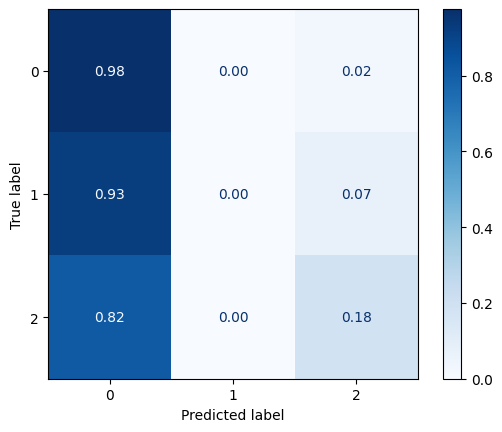

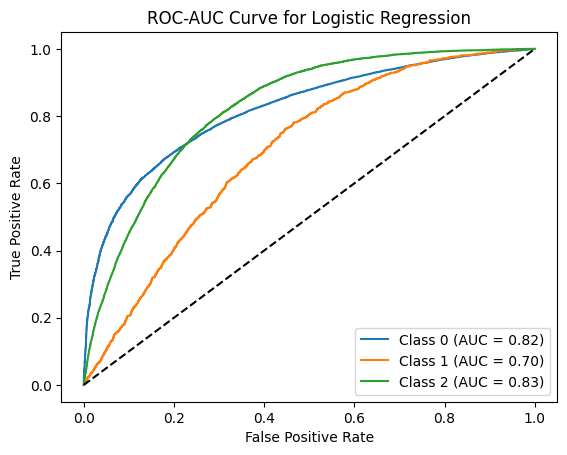

Classification Report for Random Forest:
              precision    recall  f1-score   support

         0.0       0.87      0.97      0.91     42795
         1.0       0.00      0.00      0.00       944
         2.0       0.48      0.20      0.28      6997

    accuracy                           0.84     50736
   macro avg       0.45      0.39      0.40     50736
weighted avg       0.80      0.84      0.81     50736



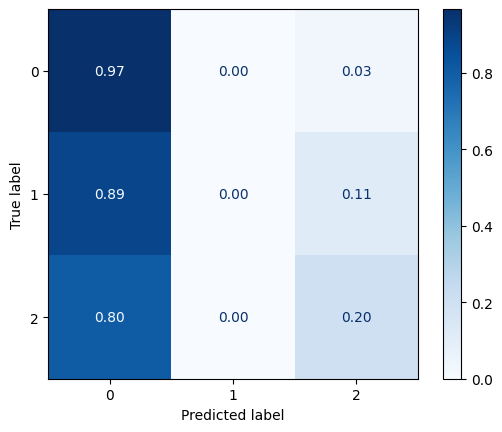

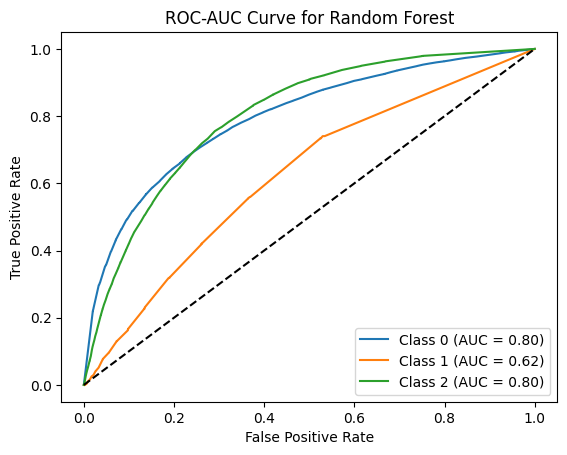

Classification Report for Decision Tree:
              precision    recall  f1-score   support

         0.0       0.88      0.85      0.87     42795
         1.0       0.03      0.04      0.03       944
         2.0       0.29      0.32      0.31      6997

    accuracy                           0.77     50736
   macro avg       0.40      0.41      0.40     50736
weighted avg       0.78      0.77      0.77     50736



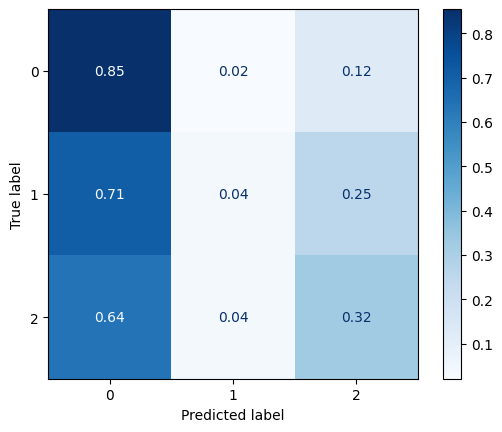

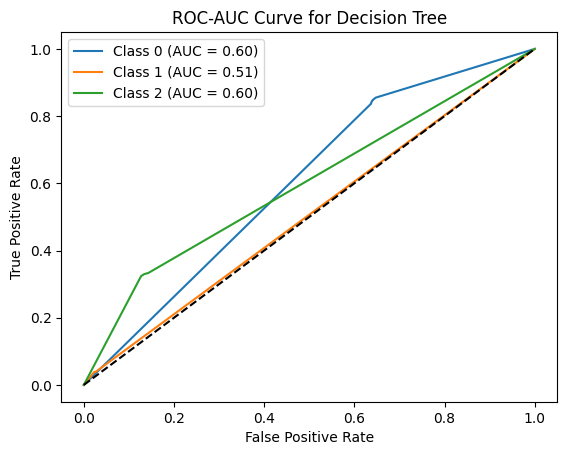

C:\Users\nikhi\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:27:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report for XGBoost:
              precision    recall  f1-score   support

         0.0       0.87      0.98      0.92     42795
         1.0       0.00      0.00      0.00       944
         2.0       0.55      0.20      0.29      6997

    accuracy                           0.85     50736
   macro avg       0.47      0.39      0.40     50736
weighted avg       0.81      0.85      0.81     50736



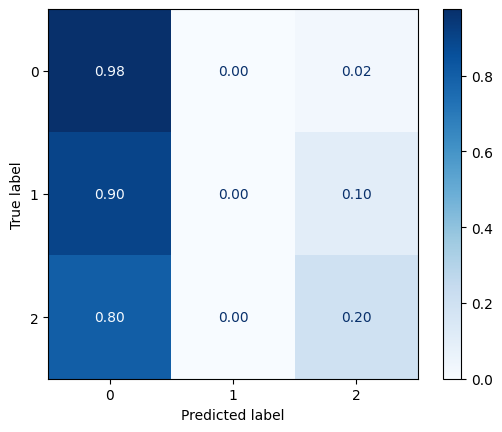

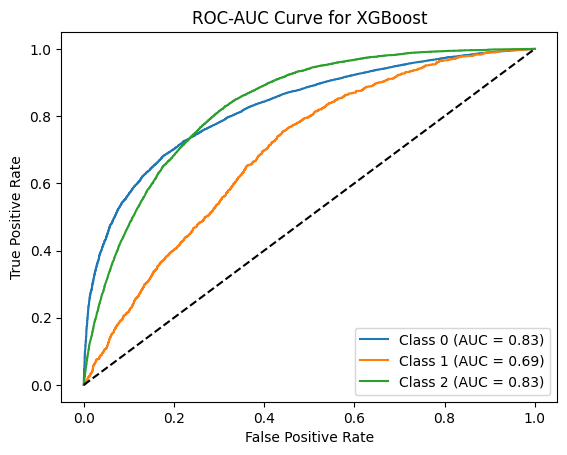

C:\Users\nikhi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Classification Report for MLP Classifier:
              precision    recall  f1-score   support

         0.0       0.87      0.97      0.92     42795
         1.0       0.00      0.00      0.00       944
         2.0       0.52      0.22      0.31      6997

    accuracy                           0.85     50736
   macro avg       0.46      0.40      0.41     50736
weighted avg       0.81      0.85      0.82     50736



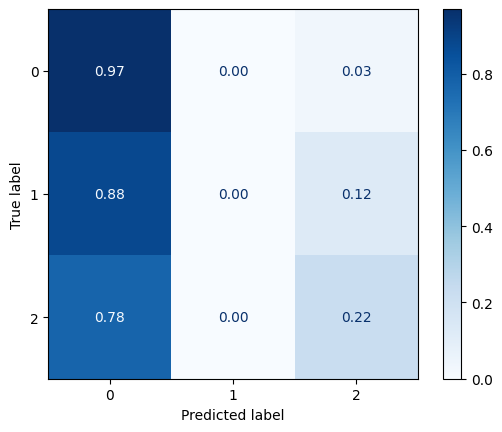

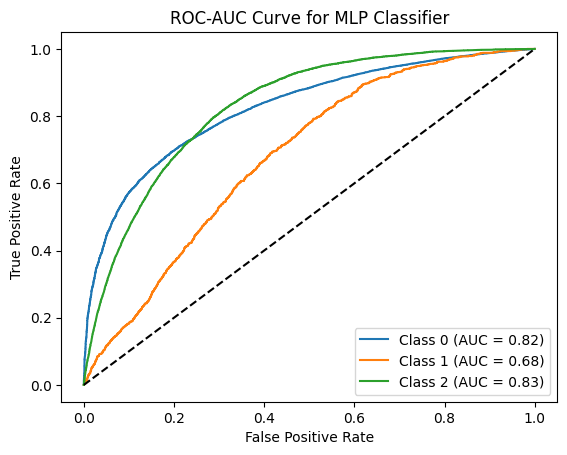

                 Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0  Logistic Regression  0.848254   0.802427  0.848254  0.810520  0.781650
1        Random Forest  0.842065   0.795316  0.842065  0.808501  0.739705
2        Decision Tree  0.766497   0.780076  0.766497  0.773028  0.568639
3              XGBoost  0.850442   0.806527  0.850442  0.814227  0.784529
4       MLP Classifier  0.848569   0.805231  0.848569  0.816348  0.777901


In [14]:

from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay

# Split dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
     "Decision Tree": DecisionTreeClassifier(),
     "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss"),
     "MLP Classifier": MLPClassifier(hidden_layer_sizes=(50, 50),max_iter=100)
}

# Store results
results = []
# Train models and evaluate metrics
for name, model in models.items():
    # Train model
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)  # Probability estimates for ROC curve

    # Compute metrics
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob, multi_class="ovr")

    report = classification_report(y_test, y_pred, output_dict=True)

    # Save classification report to a file
    print(f"Classification Report for {name}:")
    print(classification_report(y_test, y_pred))
    cm=confusion_matrix(y_test, y_pred)
    cm_normalized = cm.astype('float') / cm.sum(axis=1, keepdims=True)

    # Display the normalized confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized)
    disp.plot(cmap="Blues", values_format=".2f")
    plt.show()

    # Append results
    results.append([name, accuracy, report['weighted avg']['precision'],
                    report['weighted avg']['recall'], report['weighted avg']['f1-score'], roc_auc])

    # ROC Curve
    from sklearn.preprocessing import label_binarize

# Binarize the labels for multi-class ROC curve
    y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])  # Adjust based on your unique classes
    n_classes = y_test_binarized.shape[1]

# Plot ROC curve for each class
    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
        plt.plot(fpr, tpr, label=f"Class {i} (AUC = {roc_auc_score(y_test_binarized[:, i], y_prob[:, i]):.2f})")

    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC-AUC Curve for {name}")
    plt.legend()
    plt.show()

# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score", "AUC"])
print(results_df)



Classification Report for Logistic Regression:
              precision    recall  f1-score   support

         0.0       0.61      0.66      0.63     42688
         1.0       0.43      0.34      0.38     42676
         2.0       0.51      0.58      0.55     42858

    accuracy                           0.53    128222
   macro avg       0.52      0.53      0.52    128222
weighted avg       0.52      0.53      0.52    128222



<Figure size 1000x600 with 0 Axes>

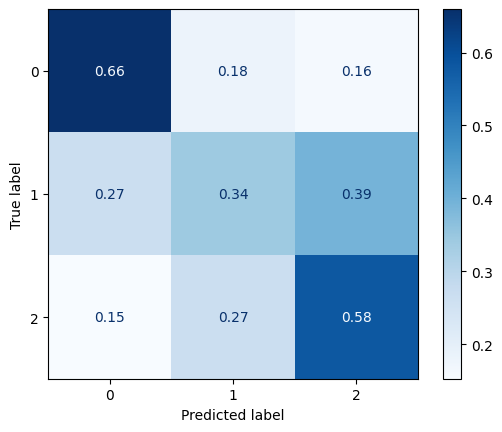

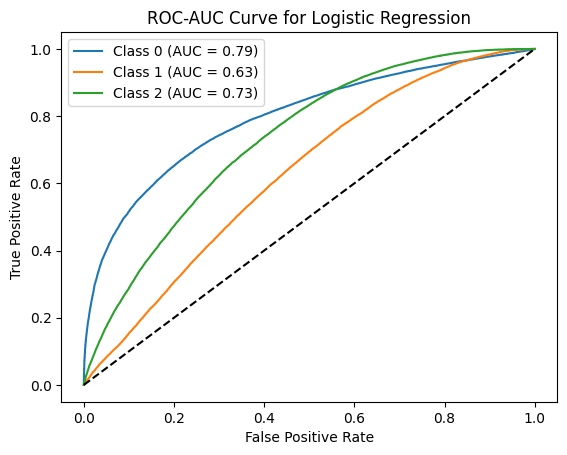

Classification Report for Random Forest:
              precision    recall  f1-score   support

         0.0       0.90      0.92      0.91     42688
         1.0       0.97      0.97      0.97     42676
         2.0       0.91      0.89      0.90     42858

    accuracy                           0.93    128222
   macro avg       0.93      0.93      0.93    128222
weighted avg       0.93      0.93      0.93    128222



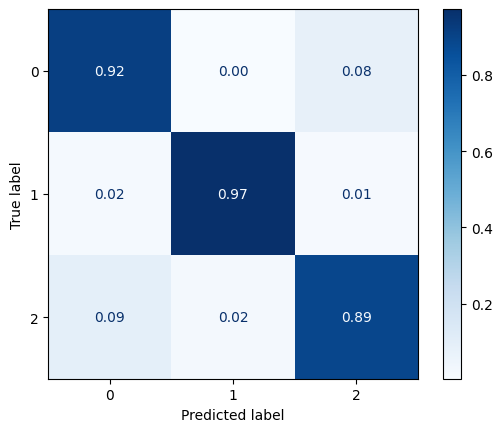

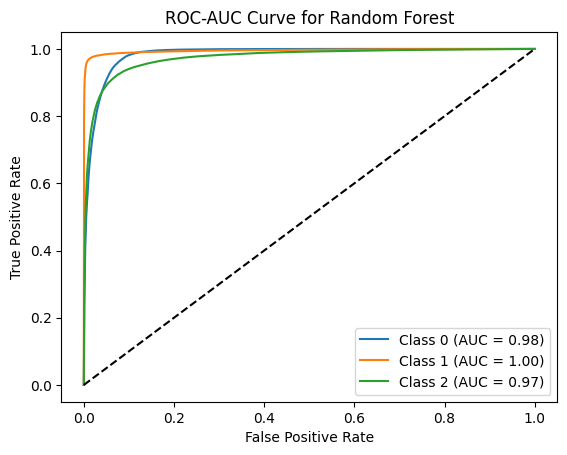

Classification Report for Decision Tree:
              precision    recall  f1-score   support

         0.0       0.86      0.85      0.86     42688
         1.0       0.86      0.90      0.88     42676
         2.0       0.78      0.77      0.77     42858

    accuracy                           0.84    128222
   macro avg       0.84      0.84      0.84    128222
weighted avg       0.84      0.84      0.84    128222



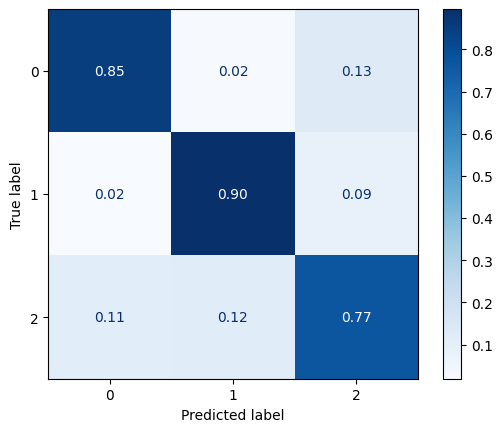

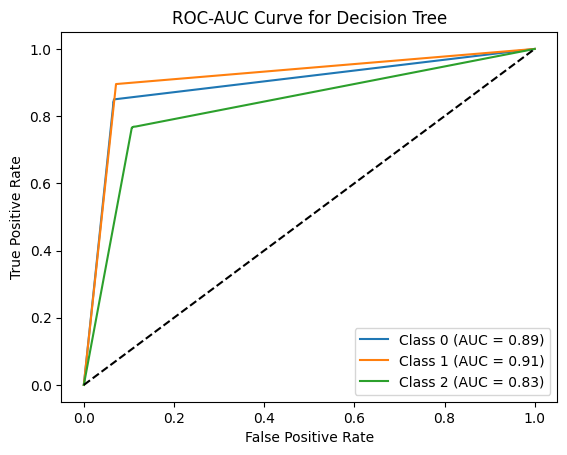

C:\Users\nikhi\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:52:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report for XGBoost:
              precision    recall  f1-score   support

         0.0       0.86      0.96      0.91     42688
         1.0       0.82      0.82      0.82     42676
         2.0       0.78      0.68      0.73     42858

    accuracy                           0.82    128222
   macro avg       0.82      0.82      0.82    128222
weighted avg       0.82      0.82      0.82    128222



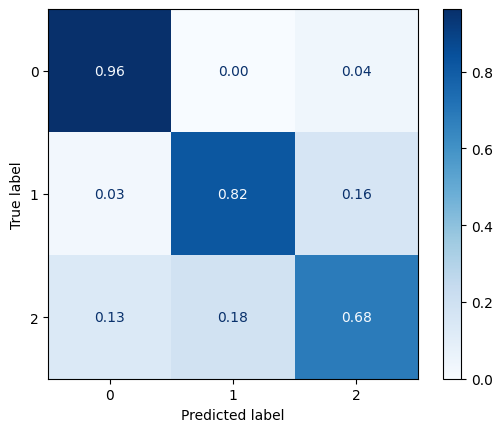

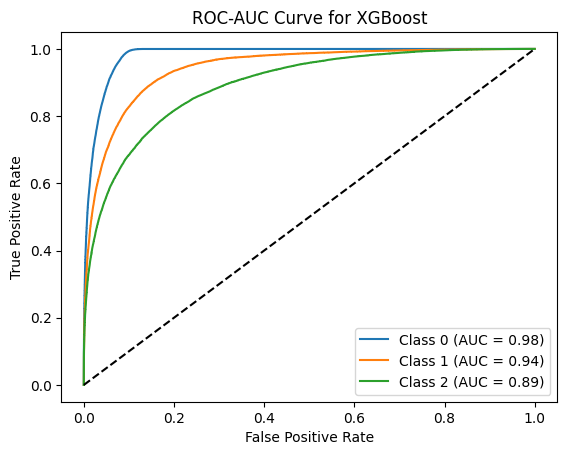

C:\Users\nikhi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Classification Report for MLP:
              precision    recall  f1-score   support

         0.0       0.68      0.69      0.69     42688
         1.0       0.69      0.61      0.64     42676
         2.0       0.60      0.66      0.63     42858

    accuracy                           0.65    128222
   macro avg       0.66      0.65      0.65    128222
weighted avg       0.66      0.65      0.65    128222



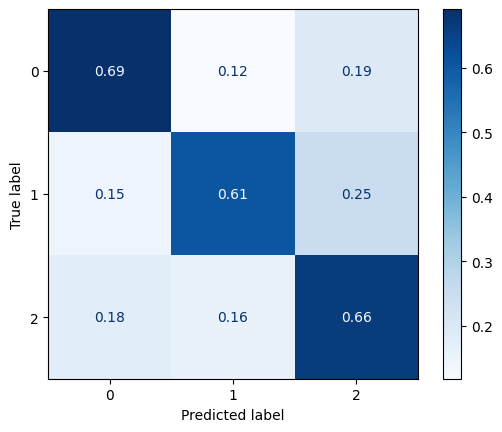

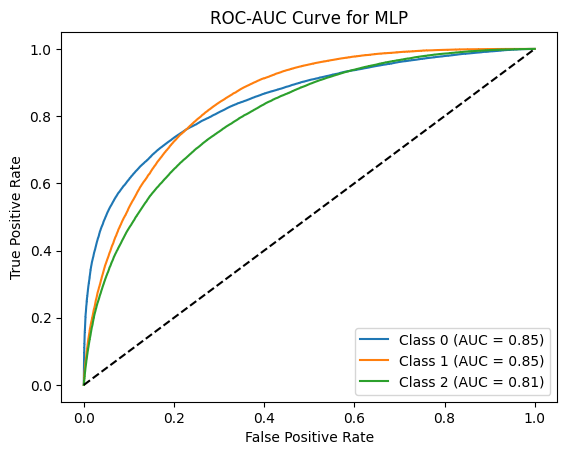

                 Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0  Logistic Regression  0.527913   0.519703  0.527913  0.521035  0.719335
1        Random Forest  0.925231   0.925330  0.925231  0.925212  0.983976
2        Decision Tree  0.836752   0.836199  0.836752  0.836318  0.877927
3              XGBoost  0.820538   0.817283  0.820538  0.816877  0.939428
4                  MLP  0.653055   0.655977  0.653055  0.653168  0.835553


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay


df=pd.read_csv(r"C:\Users\nikhi\OneDrive\Desktop\Kullai mini project\diabetes dataset\dataset mentioned in paper with 2lakh records.csv")
df

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Split dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    "MLP": MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=100)
}

# Store results
results = []
plt.figure(figsize=(10, 6))

for name, model in models.items():
    # Train model
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)  # Probability estimates for ROC curve

    # Compute metrics
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob, multi_class="ovr")

    report = classification_report(y_test, y_pred, output_dict=True)

    # Save classification report to a file
    print(f"Classification Report for {name}:")
    print(classification_report(y_test, y_pred))
    cm=confusion_matrix(y_test, y_pred)
    cm_normalized = cm.astype('float') / cm.sum(axis=1, keepdims=True)

    # Display the normalized confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized)
    disp.plot(cmap="Blues", values_format=".2f")
    plt.show()

    # Append results
    results.append([name, accuracy, report['weighted avg']['precision'],
                    report['weighted avg']['recall'], report['weighted avg']['f1-score'], roc_auc])

    # ROC Curve
    from sklearn.preprocessing import label_binarize

# Binarize the labels for multi-class ROC curve
    y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])  # Adjust based on your unique classes
    n_classes = y_test_binarized.shape[1]

# Plot ROC curve for each class
    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
        plt.plot(fpr, tpr, label=f"Class {i} (AUC = {roc_auc_score(y_test_binarized[:, i], y_prob[:, i]):.2f})")

    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC-AUC Curve for {name}")
    plt.legend()
    plt.show()

# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score", "AUC"])
print(results_df)





In [37]:
from sklearn.inspection import PartialDependenceDisplay

from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

# === Load the dataset ===
df=pd.read_csv(r"C:\Users\kulla\Desktop\Projects\Mini Project\Datasets\diabetes\diabetes_012_health_indicators_BRFSS2015.csv")

# === Define features and target ===
X = df.drop("Diabetes_012", axis=1)
y = df["Diabetes_012"]
feature_names = X.columns.tolist()  # Save feature names

# === Scale features ===
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=feature_names)  # Retain column names for PDP

# === Apply SMOTE ===
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled_df, y)

# === Split into train and test sets ===
X_train_df, X_test_df, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)

In [39]:
# === Train the XGBoost classifier ===
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train_df, y_train)

C:\Users\kulla\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:40:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

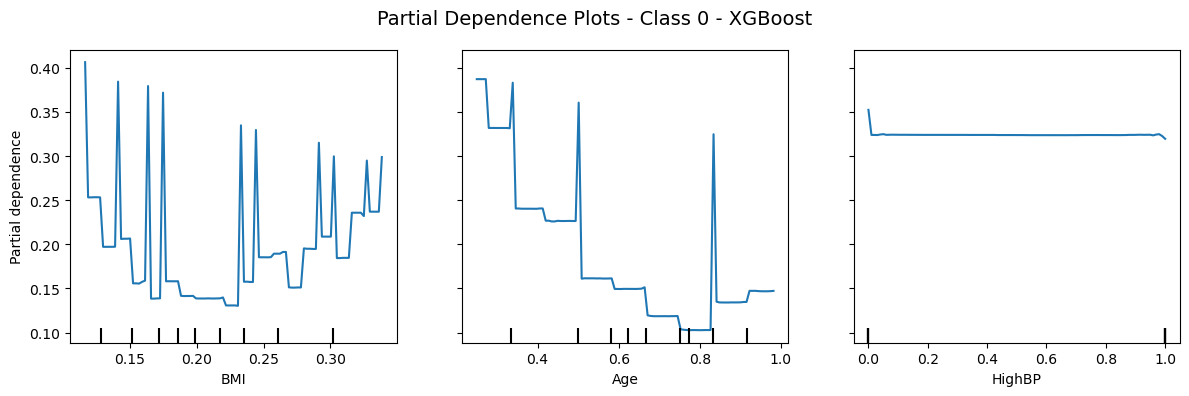

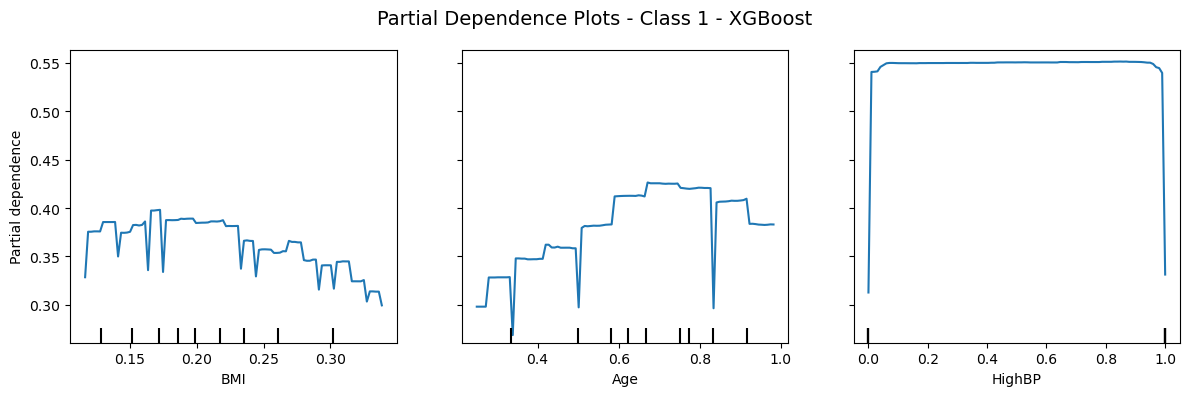

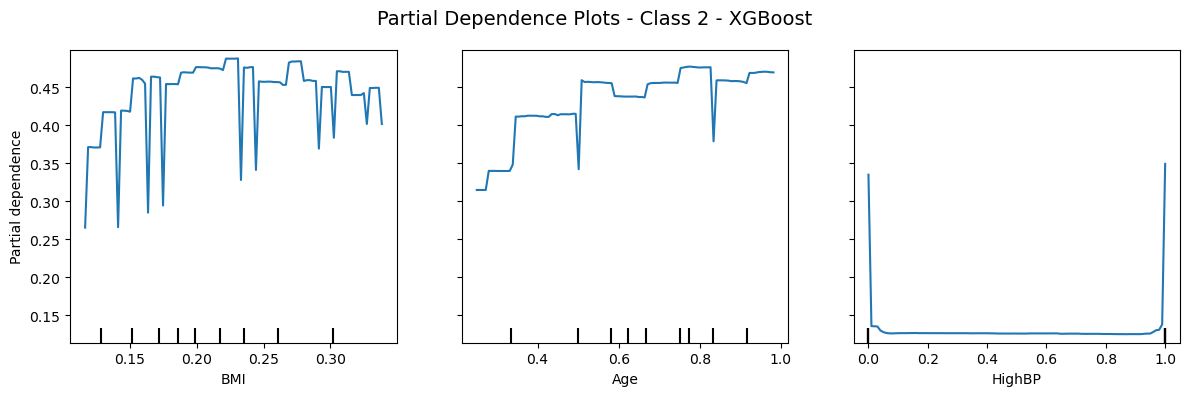

In [40]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt
import numpy as np

# === Define features to plot PDP ===
features_to_plot = ['BMI', 'Age', 'HighBP']  # Choose meaningful features

# === Plot Partial Dependence for each class ===
for class_idx in np.unique(y_test):  # Loop over all unique class labels
    fig, ax = plt.subplots(figsize=(12, 4))

    PartialDependenceDisplay.from_estimator(
        xgb_model,
        X_test_df,  # Must be a DataFrame with column names
        features=features_to_plot,
        feature_names=feature_names,
        target=class_idx,  # Specify the class index (target) for each plot
        ax=ax
    )

    plt.suptitle(f"Partial Dependence Plots - Class {class_idx} - XGBoost", fontsize=14)
    plt.tight_layout()
    plt.show()
